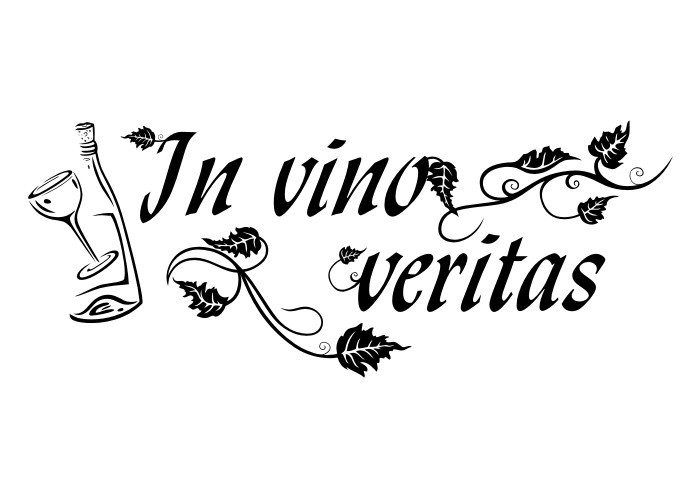

# Wine Quality

In this project, we will work with a dataset downloaded from [Kaggle](https://www.kaggle.com/rajyellow46/wine-quality). It is related to red and white variants of the Portuguese [Vinho Verde](https://en.wikipedia.org/wiki/Vinho_Verde) wine. 

We will explore and visualise the differences between the two types of wine - white and red. Afterwards, we will use the dataset to train our models to predict the qulity of the wine based on the attributes.

Before we begin, let's spend some time exploring the different attributes and what information they give us:

- `Fixed acidity` - the predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid. (Source: [Waterhouse Lab](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid))
- `Volatile acidity`  - a measure of the wine's gaseous acids that contributes to the smell and taste of vinegar in wine. (Source: [PennState Extension](https://extension.psu.edu/volatile-acidity-in-wine))
- `Citric acid` - often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor. (Source: [Waterhouse Lab](https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid))
- `Residual sugar` - natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It’s measured in grams per liter. (Source: [WineFolly](https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/))
- `Chlorides` - the amount of salt in the wine.
- `Free sulfur dioxide` - a measure of the amount of SO2 that is not bound to other molecules, and is used to calculate molecular SO2. Sulfur Dioxide is used throughout all stages of the winemaking process to prevent oxidation and microbial growth. (Source: [Laboratoire Obst](https://www.laboratoire-obst.com/so2-libre-en.html#:~:text=Free%20sulfur%20dioxide%20is%20a,prevent%20oxidation%20and%20microbial%20growth.))
- `Total sulfur dioxide` - the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. (Source: [Midwest Grape and Wine Industry Institute](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too#:~:text=Simply%20put%2C%20Total%20Sulfur%20Dioxide,aldehydes%2C%20pigments%2C%20or%20sugars.))
- `Density` - the typical density or specific gravity of wine is generally between 1.080 and 1.090. This essentially means  wine is 8-9% more dense than water. (Source: [Creative Connoisseur](http://www.creativeconnoisseur.com/newsletter/files/497deafe6be1b2efc87df8ac6071e459-162.html#:~:text=The%20typical%20density%20or%20specific,9%25%20more%20dense%20than%20water.))
- `pH` - winemakers use pH as a way to measure ripeness in relation to acidity. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. Most wine pH's fall around 3 or 4; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds. (Source: [Wine Spectator](https://www.winespectator.com/articles/what-do-ph-and-ta-numbers-mean-to-a-wine-5035#:~:text=Winemakers%20use%20pH%20as%20a,3.6%20is%20best%20for%20reds.))
- `Sulphates` - prevent oxidation and help keep wines fresh. (Source: [Bon appetit](https://www.bonappetit.com/drinks/wine/article/sulfite-free-wine#:~:text=Added%20sulfites%20preserve%20freshness%20and,vinegar%20rather%20than%20a%20treasure.))
- `Alcohol` - alcohol content in wine varies between 5% and 21%. (Source: [WineFolly](https://winefolly.com/tips/alcohol-content-in-wine/))

Output variable (based on sensory data):
- `Quality` - score between 0 and 10

Let's start by opening up the dataset and doing some basic exploration.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

In [ ]:
wine = pd.read_csv('../input/wine-quality/winequalityN.csv')

wine.head()

In [ ]:
print('Number of rows in the dataset: {}.'.format(wine.shape[0]))
print('Number of columns in the dataset: {}.'.format(wine.shape[1]))

In [ ]:
wine.info()

The only column not in numeric format is the `type` column. This will be handled in a short while.

In [ ]:
missing = pd.DataFrame(wine.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total']/wine.shape[0])*100
missing.sort_values(by='%', ascending=False)

Above we see the total missing values per column as well as what percent of the total values in each column is missing. Since the missing values are not that many, let's just drop the rows with missing values.

In [ ]:
wine = wine.dropna()

print('Number of rows in the dataset after the rows with missing values were removed: {}.\n{} rows were removed.'
      .format(wine.shape[0], 6497-wine.shape[0]))

In [ ]:
wine.describe().T

## Handling columns

Now let's focus on the `quality` and `type` columns.

For the `quality` column we will:

- reduce the categories to three:
    - 0-5.5 or low quality will be labeled with `0`;
    - 5.6-7.5 or medium quality will be labeled with `1`;
    - 7.6 <: or high quality will be labeled with `2`


For the `type` column, we will represent `red` as `0` and `white` as `1`.

In [ ]:
wine['quality'] = pd.cut(wine['quality'], bins = [0, 5.5, 7.5, 10], labels = [0, 1, 2]).astype('int')

In [ ]:
wine['quality'].dtype

In [ ]:
wine['type'] = wine['type'].str.replace('red', '0').str.replace('white', '1').astype('int')

wine['type'].dtype

## Looking for outliers

Let's now visualize some of the attrinutes the wine has and look for outliers. 

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=wine)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

We see that there are some serious outliers in the `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide` columns. Let's remove anything that is above three standard deviations from the mean of the column.

In [ ]:
cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']

for c in cols:
    upper_level = wine[c].mean() + 3*wine[c].std()
    lower_level = wine[c].mean() - 3*wine[c].std()
    wine = wine[(wine[c] > lower_level) & (wine[c] < upper_level)]

In [ ]:
print('Number of rows in the dataset after the rows with missing values were removed: {}.\n{} rows were removed.'
      .format(wine.shape[0], 6463-wine.shape[0]))

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=wine)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

## White vs Red Wine: Different not just in Color

In [ ]:
(wine['type'].value_counts(normalize=True)*100).plot.bar(color=('white', 'red'), edgecolor='black', figsize=(10,8))
plt.xlabel('Type')
plt.ylabel('Percent')
plt.xticks(rotation=0)
plt.title('Wines per Type', size=15, y=1.02)
plt.show()

In [ ]:
rw = round(wine[wine['type'] == 0].describe().T, 2)
ww = round(wine[wine['type'] == 1].describe().T, 2)
df = pd.concat([ww, rw], axis=1, keys=['White Wines', 'Red Wines']).drop('type', axis=0)

df

Above we see a side by side descriptive comparison of White wines vs Red wines.

It can be concluded that on average:

- red wines are more acidic, denser and have a higher pH than white wines;
- white wines contain more sugar and more sulfurs;
- it seems like alcohol content is not that different in both types of wines.

Additionally, white wines are better represented in the dataset - 75% of all wines in the dataset are white. Let's visualize that:

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=wine, x='quality', hue='type', palette = {0: 'red', 1: 'white'}, edgecolor='black')
plt.title('Quality Count per Type', size=17, y=1.02)
plt.yticks(range(0,3200, 200))
plt.show()

Above we see that the number of white wines in the dataset is much higher than the number of red wines.

Additionally, we see that the majority of both types of wines have received a medium quality mark. Very few wines have received high quality mark. This inbalance needs to be addressed when training our models.

Now, let's try to visualize how the different wine attributes affect the quality mark the wine has received.

In [ ]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for c in cols:
    plt.figure(figsize=(10,7))
    sns.barplot(y=c, x='quality', data=wine, hue='type', palette = {0: 'red', 1: 'white'}, edgecolor='black', ci=None)
    plt.title('{} per quality'.format(c))
    plt.show()

A few quick observations:

- The higher the quality mark, the higher the fixed acidity in red wines.
- The lower the volatile acidity, the higher the quality mark for red wines.
- The higher the citric acid, the better quality mark for red wines.
- The higher the residual sugar, the lower the quality for white wines.
- The lower the chlorides, the better the quality mark regardless of type of wine.
- The lower the free sulfur dioxide, the better the quality mark for red wines.
- The lower the total sulfur dioxide, the better the quality mark regardless of type of wine.
- The density and pH are pretty much consistant for all qualities and types of wine.
- The higher the sulphates in red wine, the better the quality mark.
- The higher the alcohol, the better the quality mark regardless of type of wine.

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

The `quality` of the wine has the strongest possitive correlation with the `alcohol` attribute and the strongest negative correlation with the `density` attribute.

## Choose and Train a Model

Now it's time to create a model which will be trained on the dataset and afterwards will predict the quality of the wine based on its attributes.

The PyCaret library will be used on order to find the best classification model for our dataset.

In [ ]:
from pycaret.classification import *
exp_name = setup(data = wine,  target = 'quality')

In [ ]:
best_model = compare_models()

It looks like the **Extra Trees Classifier** model yeilds best results with the dataset, achieveing 80% accuracy. The **Random Forest Classifier** and the **CatBoost Classifier** are not dar behind.

## Building an Extra Trees Classifier Model

In [ ]:
et = create_model('et')

In [ ]:
print(et)

## Visualize the ET Model

In [ ]:
plot_model(et, plot = 'confusion_matrix')

In [ ]:
plot_model(et, plot = 'class_report')

In [ ]:
plot_model(et, plot = 'error')

## Make ET Predictions on the Test Set 

It is now time to make predictions on the test set which was created in the set up step.

In [ ]:
predict_model(et)

The model achieved 78% accuracy on the test set which is not far behind the 80% achieved on the trainig set.

Now, let's see if the **Random Forest Classifier Model** could beat that result.

## Building a Random Forest Classifier Model

In [ ]:
rf = create_model('rf')

In [ ]:
print(rf)

## Visualize the ET Model

In [ ]:
plot_model(rf, plot = 'confusion_matrix')

In [ ]:
plot_model(rf, plot = 'class_report')

In [ ]:
plot_model(rf, plot = 'error')

## Make RF Predictions on the Test Set 

It is now time to make predictions on the test set which was created in the set up step.

In [ ]:
predict_model(rf)

The **Random Forest** Model achieved a 79% accuracy on the test set which is the same as the accuracy achieved on the train set.

# Conclusion

In this project, we worked with a dataset covering the different attributes of the Vinho Verde wine. After cleaning up the missing values and the outliers in the data, we first trained an **Extra Trees Classifier** model using the PyCaret library to predict the quality of the wine. The model achieved a **78%** accuracy on the test dataset. Afterwards, we trained a **Random Forest** model which achieved a slightly better accuracy of **79%** on the test dataset.